## Линейная алгебра. Лабораторная работа 1, осень 2020

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [4]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

# Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [5]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [6]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
# нулевая матрица
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:
# диагональная матрица
A = np.diag([1, 2, 3, 4, 5])
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [9]:
# след диагональной матрицы
A_trace = A.trace()
print(A_trace)

15


In [10]:
# обратная матрица
print(sla.inv(A))

[[ 1.          0.          0.          0.         -0.        ]
 [ 0.          0.5         0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [11]:
# случайная матрица
X = np.random.rand(4, 5)
print(X)

[[0.54411412 0.03921644 0.38692115 0.96116392 0.04727328]
 [0.32443373 0.75306015 0.88519779 0.94286072 0.20219798]
 [0.9250166  0.06888729 0.67105271 0.59547089 0.7078328 ]
 [0.24500523 0.73887487 0.02970184 0.38435452 0.4445803 ]]


In [12]:
# определитель на пересечении
print(sla.det(X[np.ix_([1, 2], [0, 1])]))

-0.6742437832550395


In [14]:
# произведение 
X_T = X.T
print(X.dot(X_T))

[[1.37337693 1.46436533 1.3714673  0.56422358]
 [1.46436533 2.38580232 1.6505657  1.1144832 ]
 [1.3714673  1.6505657  2.16632576 0.84102493]
 [0.56422358 1.1144832  0.84102493 0.95222588]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [15]:
from copy import deepcopy

def swap_rows(matrix, i, j):
        s = deepcopy(matrix[i])
        matrix[i] = matrix[j]
        matrix[j] = s
        return matrix
    
def dec_rows(matrix, i, n):
        for j in range(0, n):
            if j != i:
                e = matrix[j,i] / matrix[i,i]
                for k in range(0, n):
                    matrix[j ,k] -= matrix[i, k] * e
        return matrix

def my_det(X):
        if len(X) != len(X[0]):
            return "ValueError"
        s = 1
        matrix = deepcopy(X)
        n = len(matrix)
        for i in range(0, n):
            j = i 
            while matrix[j][i] == 0:
                if j == n - 1:
                    return 0
                else:
                    j += 1
            if i != j:
                s *= -1
                swap_rows(matrix, i, j)
            dec_rows(matrix, i, n)
        for i in range(0, n):
            s *= matrix[i ,i]
        return s

Простая проверка:

In [16]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [17]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

17.6 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
619 µs ± 4.76 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
A_1 = np.array([[1, 0], [10 ** 20, 1]])
B_1 = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
A_2 = np.array([[1., 0.], [10. ** 20, 1.]])
B_2 = np.array([[10. ** (-20), 1.], [0., 1. - 10. ** 20]])
print(A_1.dot(B_1))
print(A_2.dot(B_2))

И какой из них правильный?

---
**Напишите здесь свой ответ**

Первый вариант, т.е при целых числах

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

Определитель матрицы Паскаля равен единице, т.к матрица является симметричной и при её приведении к верхнетреугольному виду мы получим единицы на диагонали. Ну а определитель верхнетреугольной матрицы равен произведению всех элементов на ее диагонали $\rightarrow$ он равен единице.

In [11]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim), int)
    
    ans = []
    ans += [[0] * dim for i in range(dim)]
    for i in range(dim):
        ans[i][0] = 1
        ans[0][i] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            ans[i][j] = ans[i-1][j] + ans[i][j-1]
    return np.array(ans)

# тест
print(my_pascal(30)[25][20])

3169870830126


А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [12]:
Pascal = my_pascal(30)
print(sla.det(Pascal))

1.0299188904699096e+48


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [19]:
def prod_and_sq_sum(A):
    diag_prod = A.diagonal().prod()
    diag_sq = (A.diagonal()) ** 2
    diag_sq_sum = diag.sq.sum()
    return diag_prod, diag_q_sum

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [6]:
def f(A, B, k):
    new_A = A[:, : min(k, A.shape[1])]
    new_B = B[:, : min(k, B.shape[1])]
    new_B_T = new_B.T
    ans = new_A.dot(new_B_T)
    return ans

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [7]:
def get_diag(A, B):
    ans = (A * B.T)
    ans = ans.sum(axis=1)
    return ans

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [2]:
from math import sin, cos


def shrink_rotate(x, a, coef=1., angle=0.):
    ax = (x - a) * coef 
    ay = ax * (cos(angle) + sin(angle) * 1j) + a
    return ay
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    ax = (x - a) * coef 
    ay = ax * (cos(angle) + sin(angle) * 1j) + a
    ay = ay - a
    ay = abs(ay) ** 2 / ay
    return ay + a
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    v = x - a
    ans = ((r ** 2) / abs(v)) * (v / abs(v)) + a
    return ans
    raise NotImplementedError()

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

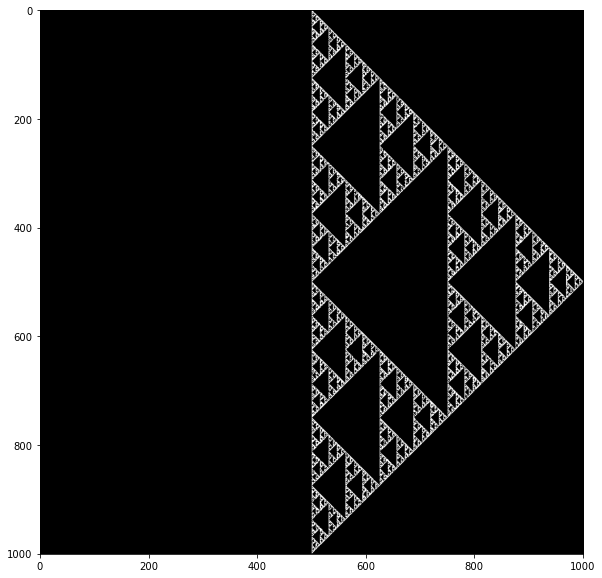

In [3]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1. * 1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0. * 1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.* 1j, coef=0.5, angle=0.))
]

ans = np.zeros((1001, 1001), dtype=int)
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        real = int(z.real * 500 + 500)
        imag = int(z.imag * 500 + 500)
        ans[real][imag] = 1
plt.figure(figsize=(10, 10))
plt.imshow(ans, cmap='gray')

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

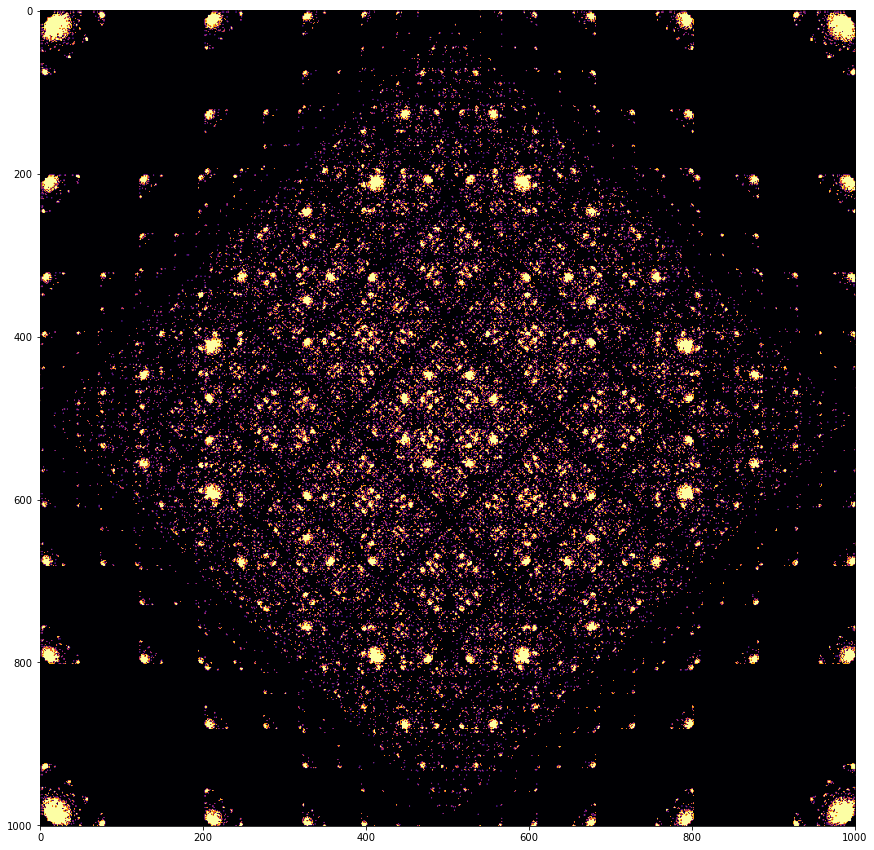

In [4]:
z = 0.5 + 0.*1j
max_iter = 1000000
funcs = [
(lambda t: shrink_rotate(t, 0. + 1. * 1j, coef=0.6, angle=0.)),
(lambda t: shrink_rotate(t, 0. - 1. * 1j, coef=0.6, angle=0.)),
(lambda t: shrink_rotate(t, 1. + 0. * 1j, coef=0.6, angle=0.)),
(lambda t: shrink_rotate(t, -1. + 0. * 1j, coef=0.6, angle=0.)),
(lambda t: geometric_inverse(t, 1. + 1*1j, 0.25)),
(lambda t: geometric_inverse(t, 1. - 1*1j, 0.25)),
(lambda t: geometric_inverse(t, -1. + 1*1j, 0.25)),
(lambda t: geometric_inverse(t, -1. - 1*1j, 0.25))
]
ans = np.zeros((1001, 1001), dtype=int)
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    real = int((z.real - 1 ) * 500)
    imag = int((z.imag - 1 ) * 500)
    ans[real][imag] = 1
plt.figure(figsize=(15, 15))
plt.imshow(ans, cmap='inferno')